In [ ]:
import pandas as pd

# https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

# Code Explanation:
https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

In [ ]:
path_to_file = 'student_scores.csv'
df = pd.read_csv(path_to_file)

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.shape

(25, 2)

<Axes: title={'center': 'Scatterplot of hours and scores percentages'}, xlabel='Hours', ylabel='Scores'>

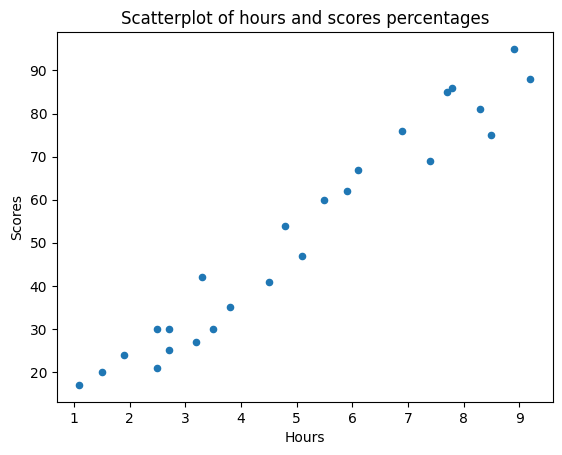

In [ ]:
df.plot.scatter(x='Hours', y='Scores', title='Scatterplot of hours and scores percentages')

In [ ]:
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [ ]:
y = df['Scores'].values.reshape(-1, 1)
X = df['Hours'].values.reshape(-1, 1)

In [ ]:
print(X.shape)
print(X)

(25, 1)
[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [ ]:
print(X_train)
print(y_train)

[[1.5]
 [7.7]
 [4.8]
 [9.2]
 [6.1]
 [6.9]
 [1.9]
 [3.2]
 [3.8]
 [2.5]
 [2.7]
 [3.3]
 [5.1]
 [2.5]
 [7.8]
 [8.5]
 [3.5]
 [8.3]
 [1.1]
 [8.9]]
[[20]
 [85]
 [54]
 [88]
 [67]
 [76]
 [24]
 [27]
 [35]
 [30]
 [25]
 [42]
 [47]
 [21]
 [86]
 [75]
 [30]
 [81]
 [17]
 [95]]


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)

[2.34415605]


In [ ]:
print(regressor.coef_)

[[9.85011963]]


In [ ]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

score = calc(regressor.coef_, regressor.intercept_, 9.5)
print(score)

[[95.92029251]]


In [ ]:
score = regressor.predict([[9.5]])
print(score)

[[95.92029251]]


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

   Actual  Predicted
0      41  46.669694
1      62  60.459862
2      30  28.939479
3      69  75.235041
4      60  56.519814


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 3.60
Mean squared error: 17.33
Root mean squared error: 4.16


# Multiple Linear Regression

In [ ]:
path_to_file = 'petrol_consumption.csv'
df = pd.read_csv(path_to_file)

In [ ]:
df.head()


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
df.shape

(48, 5)

In [ ]:
print(df.describe())

                              count     mean      std      min      25%  \
Petrol_tax                     48.0     7.67     0.95     5.00     7.00   
Average_income                 48.0  4241.83   573.62  3063.00  3739.00   
Paved_Highways                 48.0  5565.42  3491.51   431.00  3110.25   
Population_Driver_licence(%)   48.0     0.57     0.06     0.45     0.53   
Petrol_Consumption             48.0   576.77   111.89   344.00   509.50   

                                  50%      75%       max  
Petrol_tax                       7.50     8.12     10.00  
Average_income                4298.00  4578.75   5342.00  
Paved_Highways                4735.50  7156.00  17782.00  
Population_Driver_licence(%)     0.56     0.60      0.72  
Petrol_Consumption             568.50   632.75    968.00  


In [ ]:
y = df['Petrol_Consumption']
X = df[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

In [ ]:
X.shape

(48, 4)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

304.11475863030887

In [ ]:
regressor.coef_

array([-5.48336516e-02, -2.73401609e-03,  1.40354249e+03, -3.67359204e+01])

In [ ]:
feature_names = X.columns

In [ ]:
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients,
                              index = feature_names,
                              columns = ['Coefficient value'])
print(coefficients_df)

                              Coefficient value
Average_income                        -0.054834
Paved_Highways                        -0.002734
Population_Driver_licence(%)        1403.542491
Petrol_tax                           -36.735920


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
12     525  569.516274
45     510  518.701321
0      541  509.137897
29     534  455.268769
15     635  604.397782
2      561  571.277907
20     649  704.242744
27     631  605.583314
41     699  625.790854
21     540  580.278011


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 39.88
Mean squared error: 2099.30
Root mean squared error: 45.82
